<div align="center">

# 🚀 <span style="color:#4682B4;"><b>Real Time News Summarizer Agent</b></span>

*Extract, analyze, and synthesize the latest news headlines — automatically and intelligently.*

</div>

---

> <span style="font-size:1.1em">
> <kbd style="background:#F5F5DC;color:#4682B4;font-size:1.1em;padding:2px 8px;">🔗 End-to-End Pipeline</kbd> <br>
> <b>For real-world news workflows:</b><br>
> <span style="color:#1ea561">✔</span> Collect trending news from <b>Google News</b> (via SerpApi)<br>
> <span style="color:#1ea561">✔</span> Scrape and clean full article content<br>
> <span style="color:#1ea561">✔</span> Extract <b>topics, entities, sentiment</b> with <b>GCP NLP</b><br>
> <span style="color:#1ea561">✔</span> Store structured news events in <b>BigQuery</b><br>
> <span style="color:#1ea561">✔</span> Summarize insights agentically (`langgraph` + Gemini)
> </span>

---

<div style="background:#531a85ff;padding:10px;border-radius:8px;border:1px solid #531a85ff;">

### 🛠 <span><b>What’s Included?</b></span>

- <span style="color:#ffa500">⬤</span> **One-shot ETL:** Automated <span style="color:#20b67e"><b>extraction, enrichment, and database upload</b></span>
- <span style="color:#ffa500">⬤</span> **Agentic Graph Orchestration:**  
    - 💡 State-of-the-art <b>LLM planner</b> decomposes any question into topical queries  
    - ⚡ <b>Parallelized summarization</b> for scalable multi-topic coverage  
    - 🤝 Modular orchestration: <b>orchestrator → workers → synthesizer</b>
- <span style="color:#ffa500">⬤</span> **Interactive Notebook:** Demo, explore, or customize in <b>notebook.ipynb</b>
- <span style="color:#ffa500">⬤</span> **Cloud-Native:** Leverages <b>GCP NLP</b>, <b>BigQuery</b>, and secured credentials

</div>

---

<div align="center" style="font-size: 1.2em; margin-top:10px;">
✨ <b>Modular by design. Powered by intelligence. Built for scale.</b> ✨
</div>


## 🧩 Step 1: Load Environment Variables

Before running any extraction or orchestration, **make sure to load your environment variables** (API keys, project IDs, credentials) for seamless authentication and configuration.

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 📰 Step 2: Data Extractor

> **Fetch trending headlines from Google News (via SerpApi), organized by category and ready for downstream NLP processing.**

Your custom data extractor will:
- 🔎 Query multiple categories (AI, business, tech, etc.)
- 📰 Retrieve headline/title and news article URLs
- 📄 Save the results as `./data/raw_news.csv`

**Run the extractor:**



In [2]:
from data_extractor import collect_news

result=collect_news()
print(result)

🔍 Starting alternative news collection...
📰 Searching for AI news...
✅ Found 20 articles for AI
📰 Searching for business news...
✅ Found 20 articles for business
📰 Searching for politics news...
✅ Found 20 articles for politics
📰 Searching for sports news...
✅ Found 20 articles for sports
📰 Searching for tech news...
✅ Found 20 articles for tech
📰 Searching for science news...
✅ Found 20 articles for science
📰 Searching for entertainment news...
✅ Found 20 articles for entertainment

📊 results: 140 articles extracted and stored in ./data/raw_news.csv


In [8]:
import pandas as pd 
news_df=pd.read_csv('./data/raw_news.csv')
news_df.head()

,category,headline,url
0,AI,Eye on AI: Applying Artificial Intelligence to...,https://www.aacr.org/blog/2025/08/18/eye-on-ai...
1,AI,Prediction: These 3 Artificial Intelligence (A...,https://www.fool.com/investing/2025/08/18/pred...
2,AI,Why I keep telling you about AI (artificial in...,https://www.timberjay.com/stories/why-i-keep-t...
3,AI,Research suggests doctors might quickly become...,https://www.npr.org/sections/shots-health-news...
4,AI,The Algorithm Will See You Now: AI’s Role at t...,https://www.renalandurologynews.com/features/a...


## 🛠️ Step 3: Web Scraping & Preprocessing

> **Extract full article content, analyze using Google NLP, and create a clean, enriched news dataset.**

Your preprocessing pipeline will:
- 🌐 Scrape main article text from each news URL (using `newspaper3k`)
- 🧠 Run Google Cloud NLP for:
    - Entity extraction (ranked by salience)
    - Topic/category classification (with confidence)
    - Sentiment analysis
- ⚡ Process news in parallel for speed!
- ✨ Write cleaned/enriched results to `./data/preprocessed_news.csv`

**Run the preprocessor:**



In [2]:
from preprocessor import extract_and_preprocess
result=extract_and_preprocess()
print(result)

https://www.reuters.com/technology/artificial-intelligence/ai-will-replace-most-humans-then-what-2025-08-19/: Failed to fetch page: 401
https://coloradonewsline.com/2025/08/20/reform-sweeping-ai-law-colorado/: Failed to fetch page: 403
https://diginomica.com/mit-artificial-intelligence-ai-report-fallout-if-ai-winter-coming-it-cant-arrive-soon-enough: Content too short or access restricted
https://www.reuters.com/world/us/americans-fear-ai-permanently-displacing-workers-reutersipsos-poll-finds-2025-08-19/: Failed to fetch page: 401
Article 1 extraction complete
Article 2 extraction complete
Article 3 extraction complete
Article 4 extraction complete
Article 5 extraction complete
Article 6 extraction complete
Article 7 extraction complete
Article 8 extraction complete
https://www.nytimes.com/2025/08/22/business/stock-market-nvidia-trump.html: Failed to fetch page: 403
Article 9 extraction complete
https://www.reuters.com/business/finance/powell-fires-up-markets-some-investors-see-reason-

## 🧹 Step 4: Final Merging & Cleanup

> **Merge raw and preprocessed news data, automatically filtering out failed or low-quality records for a pristine analysis dataset.**

This step will:
- 🤝 Combine `raw_news.csv` and `preprocessed_news.csv`
- 🚫 Remove rows with errors (e.g., "Failed to fetch page", "ERROR" tags)
- 💎 Output the clean, final dataset: `./data/news.csv`

**Execute the merge & cleanup:**



In [1]:
from preprocessor import combine_data
combine_data()

'Data combined at ./data/news.csv '

In [5]:
import pandas as pd
final_df=pd.read_csv('./data/news.csv')
final_df.head()

,category,headline,url,extracted_text,sentiment,entities,detailed_category
0,AI,Eye on AI: Applying Artificial Intelligence to...,https://www.aacr.org/blog/2025/08/18/eye-on-ai...,Artificial intelligence (AI) may be all over t...,"Sentiment score 0.10000000149011612 , Sentimen...","name:AI type: 3 Salience 0.010502318851649761,...","Category:/Health/Health Conditions/Cancer , Ca..."
1,AI,Prediction: These 3 Artificial Intelligence (A...,https://www.fool.com/investing/2025/08/18/pred...,Ten years. $10 trillion. Easy peasy?\n\nIt too...,"Sentiment score 0.10000000149011612 , Sentimen...",name:Nvidia type: 3 Salience 0.111334152519702...,"Category:/Business & Industrial , Category_con..."
2,AI,Why I keep telling you about AI (artificial in...,https://www.timberjay.com/stories/why-i-keep-t...,"Posted Thursday, August 21, 2025 8:22 am\n\nI ...","Sentiment score -0.10000000149011612 , Sentime...",name:Joe Q. Public type: 1 Salience 0.18942336...,"Category:None , Category_confidence:0%"
3,AI,Research suggests doctors might quickly become...,https://www.npr.org/sections/shots-health-news...,Research suggests doctors might quickly become...,"Sentiment score -0.20000000298023224 , Sentime...",name:Johan Hulleman type: 1 Salience 0.0839435...,"Category:/Health/Health Conditions , Category_..."
4,AI,Research suggests doctors might quickly become...,https://www.npr.org/sections/shots-health-news...,Research suggests doctors might quickly become...,"Sentiment score -0.20000000298023224 , Sentime...",name:Johan Hulleman type: 1 Salience 0.0839435...,"Category:/Health/Health Conditions , Category_..."


## 🏢 Step 6: Insert Preprocessed Data into BigQuery

> **Store your cleaned news dataset in Google BigQuery for powerful querying, analytics, and downstream applications.**

This step will:
- 📤 Upload `./data/news.csv` directly into your chosen BigQuery dataset and table
- 🗂️ Enable SQL queries across all preprocessed news
- 🔒 Ensure your data is securely stored in the cloud

**Run the BigQuery ingestion:**



In [2]:
from preprocessor import create_table_from_csv_direct

create_table_from_csv_direct('./data/news.csv')

Created dataset news in location US
Loaded 108 rows into logical-stacker-469820-v4.news.news_data
Table logical-stacker-469820-v4.news.news_data now has 108 rows and 7 columns


## 🛠️ Step 7: Initialize Tools for BigQuery Operations

> **Set up convenient helpers to run queries and interact with your BigQuery news dataset effortlessly.**

The `Bq_tools` class will:
- 🔎 Provide handy methods for searching and filtering news by category or search term
- ⚡ Let you run analytical SQL queries on your curated dataset
- 🤖 Simplify downstream usage in your notebook (just call the methods as needed!)

**Initialize your BigQuery tools:**



In [2]:
from agents.tools import Bq_tools

tools=Bq_tools()
category_result=tools.get_news_by_category("tech")
keyword_result=tools.get_news_by_search_term('openai')

C:\Users\ganap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
C:\Users\ganap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [3]:
category_result

[{'headline': 'Why Did a $10 Billion Startup Let Me Vibe-Code for Them—and Why Did I Love It?',
  'extracted_text': 'Sitting a few feet away was Simon Last, one of Notion’s three cofounders. He is gangly and shy, an engineer who has relinquished management responsibilities to focus on being a “super IC”—an individual contributor. He stood to shake my hand, and I awkwardly thanked him for letting me vibe-code. Simon returned to his laptop, where he was monitoring an AI as it coded for him. Later, he would tell me that using AI coding apps was like managing a bunch of interns.\n\nSince 2022, the Notion app has had an AI assistant to help users draft their notes. Now the company is refashioning this as an “agent,” a type of AI that will work autonomously in the background on your behalf while you tackle other tasks. To pull this off, human engineers need to write lots of code.\n\nThey open up Cursor and select which of several AI models they’d like to tap into. Most engineers I chatted wi

In [4]:
keyword_result

[{'headline': 'Artificial Intelligence And Emotional Intimacy : 1A',
  'extracted_text': 'Artificial Intelligence And Emotional Intimacy\n\nChatGPT has at least 500 million weekly users. OpenAI CEO Sam Altman says that number is growing extraordinarily fast.\n\n\n\nWhen the chatbot went through an update a couple weeks ago, it brought to light how many users were relying on AI for their emotional wellbeing and even as a companion.\n\n\n\nPeople using AI for intimate, personal reasons is a phenomenon that we are only beginning to understand.\n\n\n\nThere are reports of AI inducing delusional thinking and even psychosis. One survey by Sentio University found that 63 percent of people involved said AI improved their mental health.\n\n\n\nWith such a powerful tool being privy to our deepest secrets, what guardrails exist to protect users’ wellbeing and privacy? Why are so many people leaning on artificial intelligence for connection in the first place?\n\n\n\nFind more of our programs onli

## 🤖 Step 8: Launch the Agentic Workflow

> **Activate the orchestrator–worker–synthesizer agent graph for smart, scalable, parallelized news summarization!**

The agentic workflow graph:
- 🧭 **Orchestrates** your query—plans and splits into relevant categories or sections
- 🤹 **Spawns parallel LLM workers** for efficient multi-topic summarization
- 📝 **Synthesizes results** into a final, concise report—for you or your end users

**Load the orchestrator graph:**



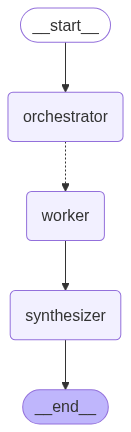

In [2]:
from agents import graph

graph

In [3]:
from langchain_core.messages import HumanMessage

result = graph.invoke({"messages": [HumanMessage(content="tell me about the latest ai news")]})


C:\Users\ganap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


assinging workers
synthesizing


## 🧭 Step 9: Inspect the Agent Graph's State

> **Peek under the hood! Track how your agent graph is planning, dividing, and synthesizing your news query in real time.**

Why inspect the graph state?
- 🛠️ **Debug:** See each node's output and spot bottlenecks or unexpected results
- 🧑‍💻 **Learn:** Understand how the orchestrator, workers, and synthesizer interact
- 📈 **Optimize:** Gain insights for tuning performance or adjusting prompts/workflow

**Example: View the current state after a run**


In [7]:
graph_states=list(result.keys())
graph_states


['messages', 'planned_sections', 'completed_sections']

In [9]:
result['messages']

[HumanMessage(content='tell me about the latest ai news', additional_kwargs={}, response_metadata={}, id='489a8b4e-4dc0-4a46-b269-901aba5f0482'),
 HumanMessage(content="# Eye on AI: Applying Artificial Intelligence to Drive Cancer Research, Part 2 \n Artificial intelligence is significantly expanding its role in cancer research and clinical practice, moving beyond traditional imaging analysis to offer sophisticated tools for patient care. Researchers are leveraging AI to enhance the accuracy and efficiency of cancer diagnoses, infer crucial genomic information from standard tissue images, and guide personalized treatment strategies by predicting patient responses. Furthermore, the development of AI-generated synthetic patient data is addressing limitations in model training, potentially broadening access to precision oncology globally. Continued progress in this field necessitates rigorous evaluation, open scientific practices, and collaborative efforts to maximize patient benefit.\n\n

In [10]:
result['planned_sections']

[HumanMessage(content='Eye on AI: Applying Artificial Intelligence to Drive Cancer Research, Part 2 \nArtificial intelligence (AI) may be all over the news now, but it’s been in oncology clinics for more than three decades, helping oncologists analyze mammograms and other imaging scans to detect signs of cancer—albeit with some limitations. With recent technological advances, however, cancer researchers are now exploring new possibilities for AI, improving existing applications and developing additional ones to expand AI’s role in the clinic.\n\nAt the AACR Special Conference on Artificial Intelligence and Machine Learning and the AACR webinar on AI and Machine Learning in IO, presenters discussed how AI can be applied across the cancer research spectrum, highlighting its promise to improve our understanding of cancer biology, accelerate drug development, and improve patient care. In Part 1 of this blog post, we dove into some of the innovative applications for discovery science and tr

In [11]:
result['completed_sections']

[AIMessage(content='# Eye on AI: Applying Artificial Intelligence to Drive Cancer Research, Part 2 \n Artificial intelligence is significantly expanding its role in cancer research and clinical practice, moving beyond traditional imaging analysis to offer sophisticated tools for patient care. Researchers are leveraging AI to enhance the accuracy and efficiency of cancer diagnoses, infer crucial genomic information from standard tissue images, and guide personalized treatment strategies by predicting patient responses. Furthermore, the development of AI-generated synthetic patient data is addressing limitations in model training, potentially broadening access to precision oncology globally. Continued progress in this field necessitates rigorous evaluation, open scientific practices, and collaborative efforts to maximize patient benefit.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='# Prediction: These 3 Artificial Intelligence (AI) Stocks Will Be Worth Over $10 Tril

## 🏁 Step 10: View and Explore Your Results

> **Review the agentic summary output—concise, structured insights powered by your full news-processing pipeline!**

What you can do in this step:
- 👀 **Display the summarized results** right in your notebook output
- ✨ **Explore, analyze, or visualize** the results—your summary is ready for further insights, charts, or sharing
- 📄 **Export** or save the response for reports or dashboards

**Example: Running and viewing the result**


In [12]:
final_report=result['messages'][-1].content

In [13]:
from IPython.display import Markdown
Markdown(final_report)

# Eye on AI: Applying Artificial Intelligence to Drive Cancer Research, Part 2 
 Artificial intelligence is significantly expanding its role in cancer research and clinical practice, moving beyond traditional imaging analysis to offer sophisticated tools for patient care. Researchers are leveraging AI to enhance the accuracy and efficiency of cancer diagnoses, infer crucial genomic information from standard tissue images, and guide personalized treatment strategies by predicting patient responses. Furthermore, the development of AI-generated synthetic patient data is addressing limitations in model training, potentially broadening access to precision oncology globally. Continued progress in this field necessitates rigorous evaluation, open scientific practices, and collaborative efforts to maximize patient benefit.

---

# Prediction: These 3 Artificial Intelligence (AI) Stocks Will Be Worth Over $10 Trillion by 2035 
 A bold prediction suggests several prominent technology companies are on track to achieve unprecedented market valuations exceeding $10 trillion by 2035, fueled by the burgeoning artificial intelligence sector. This outlook is based on anticipated sustained demand for AI processing power, ongoing innovation in core technologies, and the introduction of new AI-integrated products and services. Companies are expected to leverage advancements in areas like cloud computing, advanced hardware, and consumer devices to drive significant expansion. Should these trends materialize, the landscape of global market capitalization could see a dramatic shift, highlighting the transformative economic potential of artificial intelligence in the coming decade.

---

# Why I keep telling you about AI (artificial intelligence) 
 The widespread and often unnoticed integration of artificial intelligence profoundly shapes individual experiences and decisions across daily life. From seemingly simple digital interactions like search results and autocorrect to complex processes such as financial fraud detection, job applications, and health insurance approvals, algorithmic systems are constantly at play. Many of these influences operate beneath the surface, impacting personal choices and outcomes without direct user awareness. While offering significant benefits in areas like efficiency and security, the pervasive nature of these technologies, some of which are unregulated or driven by commercial interests, necessitates greater public understanding and transparency as a current reality.

---

# Research suggests doctors might quickly become dependent on AI 
 A recent study suggests that medical professionals might quickly develop an over-reliance on artificial intelligence, potentially diminishing their independent diagnostic abilities. The research observed a significant decline in detection rates for abnormalities during certain medical procedures when AI assistance was removed, following a period of its use. While some experts caution that these findings could stem from statistical variables rather than a loss of skill, the study highlights critical questions about the impact of AI integration on clinical practice. This raises important considerations for how technology influences human expertise in rapidly evolving healthcare environments.

---

# Research suggests doctors might quickly become dependent on AI 
 A recent study casts a troubling light on the integration of artificial intelligence in medical diagnostics, suggesting a swift decline in human expertise. After a period of using AI-assisted systems for colonoscopies, clinicians demonstrated a notable decrease in their independent ability to spot abnormalities when the AI was inactive, raising serious questions about potential over-reliance. While some express skepticism regarding the study's methodology and the rapid loss of long-honed skills, the findings underscore the urgent need for more comprehensive research into how these powerful tools fundamentally alter professional practice and skill retention.